# Matplotlib: Plotting & Visualization

*Source: Wes McKinney, Python for Data Analysis, O'Reilly*

Making plots and visualizations is one of the most important tasks in data analysis. It is part of the exploratory process, i.e. to identify outliers, or coming up with ideas for models.
Matplotlib is a (primarily 2D) plotting package designed for creating publication-quality plots. It mimics (more or less) the MATLAB structure of making plots and can export graphics to all of the common vector and raster graphics formats: PDF, SVG, JPG, PNG, BMP, GIF, etc.

Matplotlib is a fairly low-level tool. You typically assemble a plot from its base components. You can easily compose  line, bar, box, contour and scatter plots.

First import the pyplot (and numpy) Python library, and enable inline plotting (i.e. in this notebook). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randn
from matplotlib.pyplot import gcf

%matplotlib inline

## Figures, Plots and Subplots

Plots in matplotlib reside within a `Figure` object. You can create a new figure with `plt.figure`. Figures in matplotlib support a numbering scheme (e.g `plt.figure(2)`).

In [3]:
fig = plt.figure()
f = gcf()     # let's keep the figure object around for later ...

In [4]:
print(f)

Figure(432x288)


The most easy way to create a 2D plot is calling `plt.plot` with a bunch of y-coordinates. 

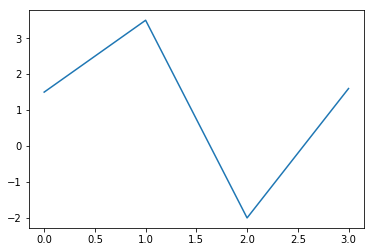

In [5]:
plt.plot([1.5, 3.5, -2, 1.6])

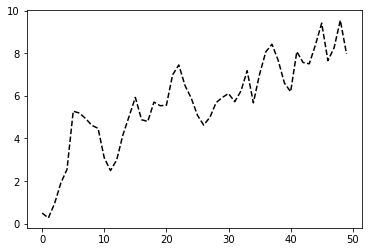

In [6]:

plt.plot(randn(50).cumsum(), 'k--')

# Note 1: randn() returns samples from the standard normal distribution.
# Note 2: cumsum() returns an array with the cumulative sums of the elements (along a given axis)

The ``k--`` *style* option instructs matplotlib to plot a black dashed line.

In data science it is very common to make subplots. You can do this with the command ``fig.add_subplot(N,M)``, which returns a numpy array with NxM ``AxisSubplot`` objects on which you can plot. 

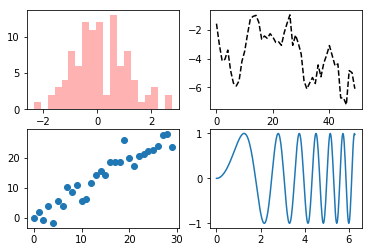

In [7]:
fig, axes = plt.subplots(2, 2)

# The first subplot first row, first column!
axes[0,0].hist(randn(100), bins=20, color='r', alpha=0.3)

# The second subplot, first row, second column
axes[0,1].plot(randn(50).cumsum(), 'k--')

# The third subplot, second row, first column
# arange() is like the built-in range but returns an ndarray instead of a list
axes[1,0].scatter(np.arange(30), np.arange(30) + 3 * randn(30))

# Slightly different notation, by default the pointer refers to the last subplot. Here we use x and y coordinates
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)

# plt.subplots_adjust(wspace=0, hspace=0) - try this and see what happens to the plots 

You can also indicate that subplots should have the same X and Y axis using: ``plt.subplot(N, M, sharex=True, sharey = True)``. Play with ``subplot_adjust`` to change the spacing around and between plots.

A convenient way to loop over all subplots:
<pre>
for i in range(N):
    for j in range(M):
        axes[i,j].plot(x, y)
</pre>

## Colors, Markers, and Line Styles

Line plot with a string abbreviation indicating color, marker, line style (in that order)

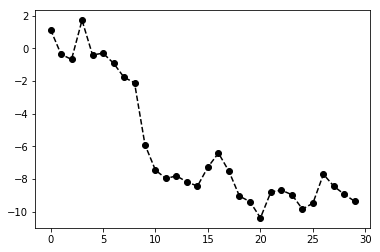

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(30).cumsum(), 'ko--')

Same line plot but now written more explicitly:

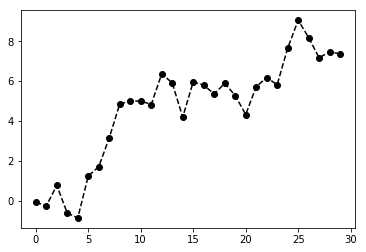

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(30).cumsum(), color= 'k', linestyle='dashed', marker='o')

You probably noticed that subsequent points are linearly interpolated by default. This can be altered with the ``drawstyle`` option. In this example you can see how to plot multiple lines and how to use a legend. Can you explain why the data is stored in a separate variable?

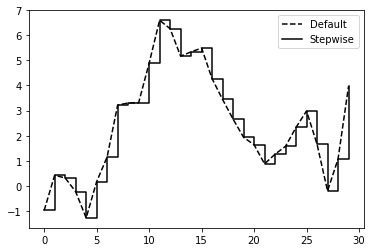

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='Stepwise')

plt.legend(loc='best')

## Labels and Ticks

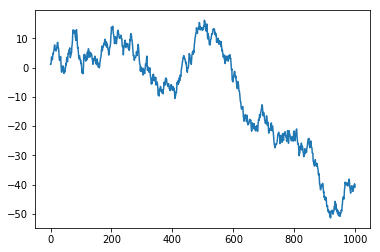

In [14]:
data = randn(1000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data.cumsum())

Now adjust the range on the x-axis (y-axis works similar)

(100, 900)

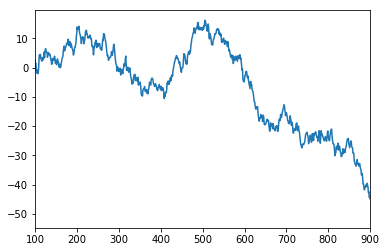

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data.cumsum())

ax.set_xlim([100, 900])
# ax.get_xlim     # obtain min and max values of the current axis

Same plot with special labels and ticks on the x-axis. Look carefully at the code, can you exp0lain what each set command does?

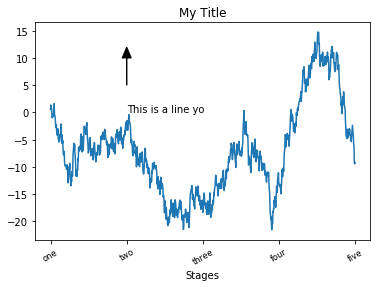

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000])
# ticks = ax.set_xticks([0, 250, 500, 750, 1000]) - use this if you want to keep the ticks!

ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_xlabel('Stages')
ax.set_title('My Title')

x = 250
y = 0
ax.text(x, y, 'This is a line yo')
ax.arrow(x, 5, 0, 5, head_width=30, head_length=2, fc='k', ec='k')    # fc = facecolor, ec = edge color

plt.savefig('Lehman.png')   # Save figure in current directory

*********************************************************************************************************************